In [60]:
# Import common libraries
import pandas as pd
import numpy as np
from copy import deepcopy
import importlib


# Import MNE processing
from mne.viz import plot_compare_evokeds
from mne import Epochs, events_from_annotations, set_log_level

# Scikit Learn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Import StatsModels
import statsmodels.formula.api as smf

# Import Plotting Library
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Internal Packages
import analysis_tools
import system_file_io

# Reset the cache
importlib.reload(analysis_tools)


<module 'system_file_io' from '/Users/nolanbrady/Desktop/fNIRs-data-pipeline/python/system_file_io.py'>

## Notes for Future Features

In [ ]:
# TODO: Allowing for custom timestamps to be imported

"""
Apparently the way to do this is: 
    events = np.array([[sample, 0, event_id, timestamp], ...])
where:
    sample: the sample number of the event in the data. This is the position in the data where the event occurs.
    0: this column is usually used as a reserved column in MNE functions, it's not used in this case.
    event_id: an integer that identifies the type of event. This can be used to distinguish different types of triggers, for example, different stimulus conditions, button presses, or other experimental events.
    timestamp: the time in seconds of the event.
"""

"\nApparently the way to do this is: \n    events = np.array([[sample, 0, event_id, timestamp], ...])\nwhere:\n    sample: the sample number of the event in the data. This is the position in the data where the event occurs.\n    0: this column is usually used as a reserved column in MNE functions, it's not used in this case.\n    event_id: an integer that identifies the type of event. This can be used to distinguish different types of triggers, for example, different stimulus conditions, button presses, or other experimental events.\n    timestamp: the time in seconds of the event.\n"

In [ ]:
# Tip for using machine learning for exploratory type data analysis

# Use principal component analysis (PCA) or independent component analysis (ICA), 
# to identify patterns in the fNIRS data that are not immediately obvious. 
# This can be used to identify latent neural networks or to identify different sources of signal variation.

# ==========================================================

# I'm curious how we could incorportate these into the data analsyis pipeline

# Anomaly detection
# Unsupervised learning algorithms such as one-class SVM, Autoencoder, and Isolation Forest can be used to identify outliers or abnormal patterns in the data.

# Time-series analysis
# Techniques such as time-series decomposition, ARIMA, and LSTM can be used to analyze the temporal dynamics of the fNIRS data and identify trends or patterns over time.

In [62]:
# Recurring values that we will keep the same

# Length of the measured interval
interval_length = 15

# How you would like to rename the numeric triggers from Aurora
trigger_id = {'4': 'Control', '2': 'Neutral', '3': 'Inflammatory', '1':'Practice'}

# What files would you like to ignore while looping through subjects
ignore = [".DS_Store", "sub-03"]

# File path to the folder containing the BIDS data.
root_dir = '../../LabResearch/IndependentStudy/DataAnalysis'

# Mock data folder to test pulling meta data from folder structure.
path = "../../LabResearch/IndependentStudy/Data"


# Find Groups and Subjects from Folder Structure

In [85]:
importlib.reload(system_file_io)

groups, df = system_file_io.import_data_folder(path, ignore)
print(df)

import data folder firing ../../LabResearch/IndependentStudy/Data
[['anon', 'sub-06', '../../LabResearch/IndependentStudy/Data/anon/sub-06/nirs/sub-06_task-AnonCom_nirs.snirf'], ['anon', 'sub-07', '../../LabResearch/IndependentStudy/Data/anon/sub-07/nirs/sub-07_task-AnonCom_nirs.snirf'], ['anon', 'sub-05', '../../LabResearch/IndependentStudy/Data/anon/sub-05/nirs/sub-05_task-AnonCom_nirs.snirf'], ['direct', 'sub-01', '../../LabResearch/IndependentStudy/Data/direct/sub-01/nirs/sub-01_task-AnonCom_nirs.snirf'], ['direct', 'sub-02', '../../LabResearch/IndependentStudy/Data/direct/sub-02/nirs/sub-02_task-AnonCom_nirs.snirf'], ['direct', 'sub-04', '../../LabResearch/IndependentStudy/Data/direct/sub-04/nirs/sub-04_task-AnonCom_nirs.snirf']]
    group sub_name                                         snirf_path
0    anon   sub-06  ../../LabResearch/IndependentStudy/Data/anon/s...
1    anon   sub-07  ../../LabResearch/IndependentStudy/Data/anon/s...
2    anon   sub-05  ../../LabResearch/Indepen

# Loop through subjects for individual analysis

In [ ]:
all_epochs = analysis_tools.aggregate_epochs(root_dir=root_dir, trigger_id=trigger_id, ignore=ignore)

all_epochs

Loading /Users/nolanbrady/Desktop/fNIRs-data-pipeline/python/../../LabResearch/IndependentStudy/DataAnalysis/BIDS_Anon/sub-06/nirs/sub-06_task-AnonCom_nirs.snirf
Reading 0 ... 18357  =      0.000 ...  1804.493 secs...
[[ 223    0    1]
 [ 271    0    1]
 [ 311    0    1]
 [ 359    0    1]
 [ 386    0    1]
 [ 434    0    1]
 [ 499    0    4]
 [ 546    0    4]
 [ 587    0    4]
 [ 634    0    4]
 [ 675    0    4]
 [ 722    0    4]
 [ 820    0    3]
 [ 868    0    3]
 [ 908    0    3]
 [ 956    0    3]
 [ 991    0    3]
 [1039    0    3]
 [1149    0    2]
 [1197    0    2]
 [1237    0    2]
 [1285    0    2]
 [1325    0    2]
 [1373    0    2]]
Loading /Users/nolanbrady/Desktop/fNIRs-data-pipeline/python/../../LabResearch/IndependentStudy/DataAnalysis/BIDS_Anon/sub-07/nirs/sub-07_task-AnonCom_nirs.snirf
Reading 0 ... 17824  =      0.000 ...  1752.099 secs...
[[ 254    0    1]
 [ 303    0    1]
 [ 333    0    1]
 [ 354    0    1]
 [ 382    0    1]
 [ 410    0    1]
 [ 468    0    4]
 [ 51

defaultdict(list,
            {'Control': [<Epochs |  3 events (all good), -1.25 - 15 sec, baseline -1.25 – 0 sec, ~171 kB, data loaded,
               'Control': 3>,
              <Epochs |  3 events (all good), -1.25 - 15 sec, baseline -1.25 – 0 sec, ~171 kB, data loaded,
               'Control': 3>,
              <Epochs |  3 events (all good), -1.25 - 15 sec, baseline -1.25 – 0 sec, ~171 kB, data loaded,
               'Control': 3>],
             'Inflammatory': [<Epochs |  3 events (all good), -1.25 - 15 sec, baseline -1.25 – 0 sec, ~171 kB, data loaded,
               'Inflammatory': 3>,
              <Epochs |  3 events (all good), -1.25 - 15 sec, baseline -1.25 – 0 sec, ~171 kB, data loaded,
               'Inflammatory': 3>,
              <Epochs |  3 events (all good), -1.25 - 15 sec, baseline -1.25 – 0 sec, ~171 kB, data loaded,
               'Inflammatory': 3>],
             'Neutral': [<Epochs |  3 events (all good), -1.25 - 15 sec, baseline -1.25 – 0 sec, ~171 kB, data

# Extract Evoked Amplitude


In [ ]:
tmin=-1
tmax=15

In [ ]:

df = analysis_tools.extract_average_amplitudes(all_epochs, tmin, tmax)
df

,ID,Chroma,Condition,Value
0,1,hbo,Control,1.684122
1,1,hbr,Control,-0.570320
2,2,hbo,Control,0.254804
3,2,hbr,Control,-0.380185
4,3,hbo,Control,-0.013204
5,3,hbr,Control,2.376384
6,1,hbo,Inflammatory,1.050461
7,1,hbr,Inflammatory,-0.307104
8,2,hbo,Inflammatory,4.735021
9,2,hbr,Inflammatory,-1.830414


In [ ]:
# Returns all measurements taken with each column being a sample taking at a certain time and the rows are a participant hbo or hbr.
amplitudes = analysis_tools.extract_all_amplitudes(all_epochs, tmin, tmax)
amplitudes

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,251
0,0.161684,-0.161684,1.574263,4.232403,3.587859,2.717065,0.850281,1.674958,2.721378,2.154469,...,2.213198,1.383067,-0.984573,0.437291,0.562221,0.197796,1.265040,2.064910,3.187037,3.004558
1,-0.055374,0.055374,-0.539155,-1.449518,-1.228774,-0.930543,-0.291205,-0.573641,-0.932020,-0.737865,...,-0.472378,-0.295197,0.210144,-0.093334,-0.119999,-0.042217,-0.270006,-0.440727,-0.680230,-0.641283
2,0.606796,-0.606796,-2.085026,-1.254237,-1.568393,-5.003764,-6.718554,-6.773773,-5.891003,-2.915713,...,-2.228402,-1.945011,-3.047765,-9.096303,-5.726347,-0.472008,-1.423577,-1.024713,-5.189065,-10.324045
3,-0.408698,0.408698,1.404339,0.844773,1.056368,3.370213,4.525185,4.562377,3.967800,1.963837,...,0.999331,0.872244,1.366775,4.079252,2.567990,0.211673,0.638406,0.459534,2.327045,4.629835
4,0.743051,-0.743051,-0.639698,7.213474,7.940565,2.341426,5.531505,7.049150,5.177131,9.920525,...,0.907183,-3.360025,-4.221259,-6.406712,-10.269180,-5.670966,-2.921780,-2.979737,-1.003421,-0.769864
5,-0.259292,0.259292,0.223226,-2.517182,-2.770904,-0.817054,-1.930249,-2.459840,-1.806589,-3.461822,...,-0.235228,0.871238,1.094551,1.661229,2.662747,1.470453,0.757603,0.772631,0.260182,0.199622
6,0.262275,-0.262275,-0.798846,-1.918071,-1.329328,-0.936125,-0.163749,-0.001683,1.836479,2.663279,...,-1.251369,-1.626792,-2.012015,-2.729760,-2.262592,-1.877387,-2.047820,-1.915725,-2.180086,-2.681396
7,-0.089824,0.089824,0.273590,0.656903,0.455270,0.320605,0.056081,0.000576,-0.628959,-0.912123,...,0.267088,0.347217,0.429438,0.582631,0.482920,0.400703,0.437080,0.408886,0.465310,0.572308
8,-1.447184,1.447184,0.700813,3.059249,6.998061,9.646200,13.407457,13.223634,11.260465,10.013790,...,7.759056,17.304160,14.445539,10.493316,4.338561,3.253155,2.466058,-1.172557,-10.180442,-21.075611
9,0.974730,-0.974730,-0.472022,-2.060513,-4.713443,-6.497059,-9.030399,-8.906588,-7.584324,-6.744644,...,-3.479562,-7.760080,-6.478126,-4.705745,-1.945635,-1.458883,-1.105908,0.525835,4.565436,9.451393


# Use PCA in order to reduce the number of points in the temporal readings

## To do
- figure out if PCA is effective for the dataset or not
- Does the dataset need to be scaled (or should it normalized)
- Why are HBO and HBR the same value?

In [ ]:
# scaler = StandardScaler()
# measurements_df = scaler.fit_transform(measurements_df)
# measurements_df = pd.DataFrame(measurements_df)

pca = PCA(n_components=1)

reduced_measurements = pca.fit_transform(amplitudes)

df['ReducedValue'] = reduced_measurements

df


,ID,Chroma,Condition,Value,ReducedValue
0,1,hbo,Control,1.684122,-22.760429
1,1,hbr,Control,-0.570320,0.874821
2,2,hbo,Control,0.254804,112.763540
3,2,hbr,Control,-0.380185,-46.716304
4,3,hbo,Control,-0.013204,93.374303
5,3,hbr,Control,2.376384,99.697063
6,1,hbo,Inflammatory,1.050461,-20.284169
7,1,hbr,Inflammatory,-0.307104,0.188080
8,2,hbo,Inflammatory,4.735021,6.377895
9,2,hbr,Inflammatory,-1.830414,-8.959169


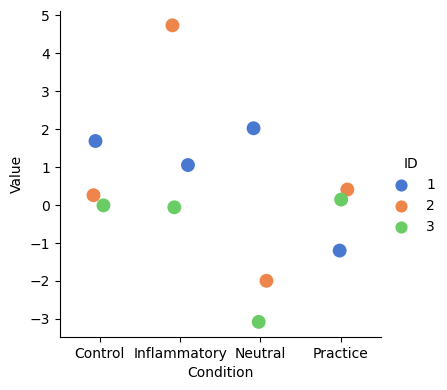

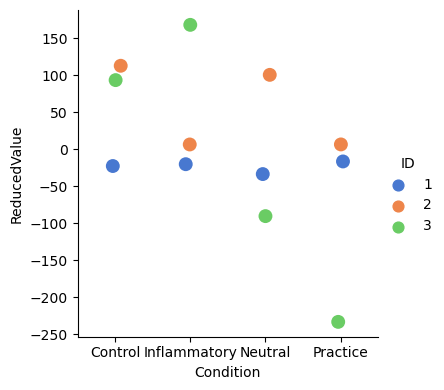

In [ ]:
# Plot the Data
sns.catplot(x="Condition", y="Value", hue="ID", data=df.query("Chroma == 'hbo'"), ci=None, palette="muted", height=4, s=10)
plt.show()

# Plot the Data
sns.catplot(x="Condition", y="ReducedValue", hue="ID", data=df.query("Chroma == 'hbo'"), ci=None, palette="muted", height=4, s=10)
plt.show()

In [ ]:
# Inflammatory vs Neutral Prompt Analysis

input_data = df.query("Condition in ['Neutral', 'Inflammatory']")
input_data = input_data.query("Chroma in ['hbo']")

model = smf.mixedlm("ReducedValue ~ Condition", input_data, groups=input_data["ID"]).fit()
model.summary()

/Users/nolanbrady/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/nolanbrady/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/nolanbrady/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/nolanbrady/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
               Mixed Linear Model Regression Results
===================================================================
Model:               MixedLM    Dependent Variable:    ReducedValue
No. Observations:    6          Method:                REML        
No. Groups:          3          Scale:                 10001.5441  
Min. group size:     2          Log-Likelihood:        -25.1954    
Max. group size:     2          Converged:             Yes         
Mean group size:     2.0                                           
-------------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z|  [0.025   0.975]
-------------------------------------------------------------------
Intercept             51.388   57.739  0.890 0.373  -61.779 164.555
Condition[T.Neutral] -59.265   81.656 -0.726 0.468 -219.307 100.778
Group Var              0.000                                       
===================================================================

"""

In [ ]:
# Control vs Neutral Prompt Analysis

input_data = df.query("Condition in ['Control', 'Neutral']")
input_data = input_data.query("Chroma in ['hbo']")

model = smf.mixedlm("Value ~ Condition", input_data, groups=input_data["ID"]).fit()
model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
             Mixed Linear Model Regression Results
===============================================================
Model:                MixedLM    Dependent Variable:    Value  
No. Observations:     6          Method:                REML   
No. Groups:           3          Scale:                 1.5845 
Min. group size:      2          Log-Likelihood:        -9.1044
Max. group size:      2          Converged:             Yes    
Mean group size:      2.0                                      
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             0.642    1.160  0.553 0.580 -1.631  2.915
Condition[T.Neutral] -1.664    1.028 -1.620 0.105 -3.679  0.350
Group Var             2.451    3.644                           
===============================================================

"""

In [ ]:
# Control vs Inflam

input_data = df.query("Condition in ['Control', 'Inflammatory']")
input_data = input_data.query("Chroma in ['hbo']")

model = smf.mixedlm("Value ~ Condition", input_data, groups=input_data["ID"]).fit()
model.summary()

/Users/nolanbrady/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/Users/nolanbrady/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
              Mixed Linear Model Regression Results
==================================================================
Model:                 MixedLM     Dependent Variable:     Value  
No. Observations:      6           Method:                 REML   
No. Groups:            3           Scale:                  3.5706 
Min. group size:       2           Log-Likelihood:         -9.3198
Max. group size:       2           Converged:              Yes    
Mean group size:       2.0                                        
------------------------------------------------------------------
                          Coef. Std.Err.   z   P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept                 0.642    1.091 0.588 0.556 -1.496  2.780
Condition[T.Inflammatory] 1.265    1.543 0.820 0.412 -1.759  4.289
Group Var                 0.000    1.498                          
==================================================================

"""